In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


from samples.rl.bandit import (
    Bandit,
    compare_agents,
)
from samples.rl.epsilon_greedy import EpsilonGreedyAgent
from samples.rl.optimistic_initial_values import OptimisticInitialValuesAgent


%matplotlib inline

## Epsilon-Greedy

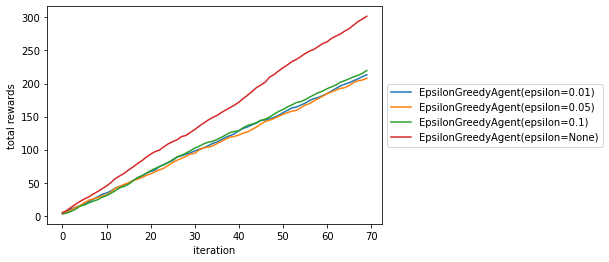

In [2]:
epsilons = [0.01, 0.05, 0.1, None]

agents = [EpsilonGreedyAgent(e) for e in epsilons]
bandits = [Bandit(m=mu) for mu in [3, 4, 5]]

iterations = 70
compare_agents(agents, bandits, iterations)

In [3]:
for agent in agents:
    print('{}: Reward = {}'.format(agent, agent.rewards_log.total_rewards))

EpsilonGreedyAgent(epsilon=0.01): Reward = 213.33160300277308
EpsilonGreedyAgent(epsilon=0.05): Reward = 207.84848171652882
EpsilonGreedyAgent(epsilon=0.1): Reward = 219.5897713270254
EpsilonGreedyAgent(epsilon=None): Reward = 301.7814720201269


## Optimistic Initial Values

In [4]:
bandits = [Bandit(m=mu, lower_bound=0, upper_bound=10) for mu in [3, 5, 7, 9]]

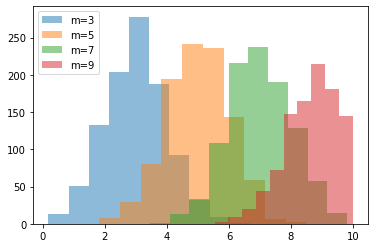

In [5]:
for b in bandits:
    plt.hist([b.pull() for _ in range(1000)], label='m={}'.format(b.m), alpha=0.5)
plt.legend()
plt.show()

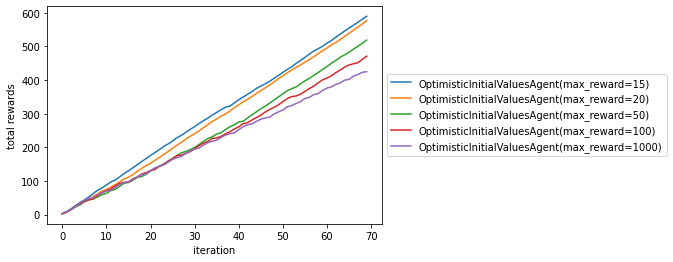

In [28]:
agents = [OptimisticInitialValuesAgent(max_reward=r) for r in [15, 20, 50, 100, 1000]]
iterations = 70
compare_agents(agents, bandits, iterations)

## Optimistic Initial Values vs Epsilon-Greedy

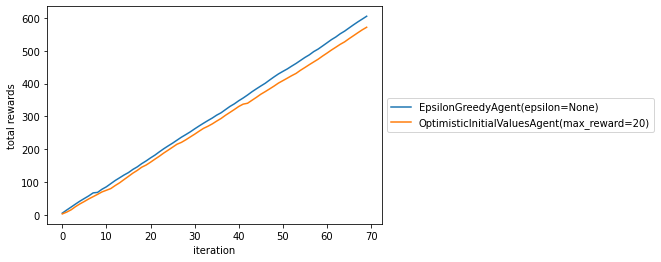

In [27]:
agents = [
    EpsilonGreedyAgent(),
    OptimisticInitialValuesAgent(max_reward=20)]

iterations = 70
compare_agents(agents, bandits, iterations)

In [25]:
def run_comparison():
    win_count = [0, 0]
    
    for _ in range(1000):
        agents = [
            EpsilonGreedyAgent(epsilon=None),
            OptimisticInitialValuesAgent(max_reward=20)
        ]

        iterations = 100
        compare_agents(agents, bandits, iterations, show_plot=False)
    
        rewards = [agent.rewards_log.total_rewards for agent in agents]
        win_count[np.argmax(rewards)] += 1
        
    return win_count

In [26]:
run_comparison()

[537, 463]